# Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# sns.set_style("whitegrid")
import datetime
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# Load Dataset

In [2]:
heart = pd.read_csv('heart.csv')
heart.shape

(319795, 18)

In [3]:
heart.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
133845,No,24.87,No,No,No,0.0,2.0,No,Female,60-64,White,No,Yes,Very good,6.0,No,No,No
187731,No,33.84,No,No,No,0.0,7.0,Yes,Female,70-74,White,No,Yes,Good,7.0,No,No,No
185062,No,29.54,No,No,No,0.0,0.0,No,Male,60-64,White,No,No,Good,9.0,No,No,No
274342,No,28.89,No,No,No,1.0,0.0,No,Male,70-74,White,No,Yes,Good,7.0,No,Yes,Yes
256337,No,28.97,No,Yes,No,0.0,0.0,No,Female,25-29,White,No,Yes,Good,9.0,No,No,No


In [4]:
heart.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

# Check information of Dataset

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Check if missing value is present or not

In [7]:
heart.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Check Datatypes

In [8]:
heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

# Dtype Conversion

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
heart.HeartDisease = le.fit_transform(heart.HeartDisease)
heart.Smoking = le.fit_transform(heart.Smoking)
heart.AlcoholDrinking = le.fit_transform(heart.AlcoholDrinking)
heart.Stroke = le.fit_transform(heart.Stroke)
heart.DiffWalking = le.fit_transform(heart.DiffWalking)
heart.Sex = le.fit_transform(heart.Sex)
heart.AgeCategory = le.fit_transform(heart.AgeCategory)
heart.Race = le.fit_transform(heart.Race)
heart.Diabetic = le.fit_transform(heart.Diabetic)
heart.PhysicalActivity = le.fit_transform(heart.PhysicalActivity)
heart.GenHealth = le.fit_transform(heart.GenHealth)
heart.Asthma = le.fit_transform(heart.Asthma)
heart.KidneyDisease = le.fit_transform(heart.KidneyDisease)
heart.SkinCancer = le.fit_transform(heart.SkinCancer)

In [11]:
heart.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

# Check Correlation

In [12]:
corr = heart.corr()
corr

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


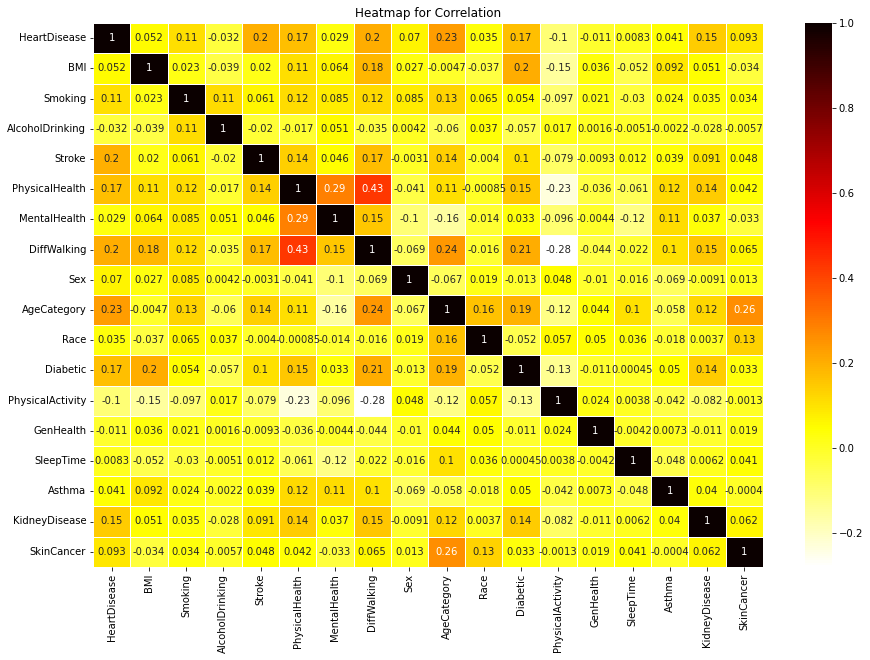

In [13]:
plt.figure(figsize=(15,10))
Heatmap=sns.heatmap(corr,linewidth=1,annot=True,cmap="hot_r")
plt.title("Heatmap for Correlation")
plt.show()

# Data Visualization

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

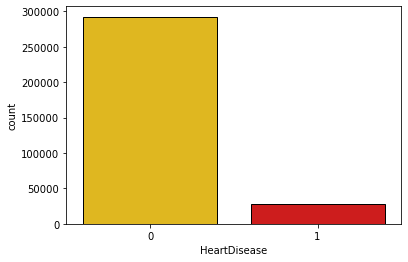

In [14]:
sns.countplot("HeartDisease", data = heart, palette="hot_r", edgecolor = "black")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

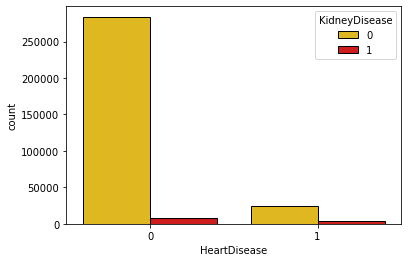

In [15]:
sns.countplot(heart.HeartDisease, hue=heart.KidneyDisease,palette="hot_r", edgecolor = "black")

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

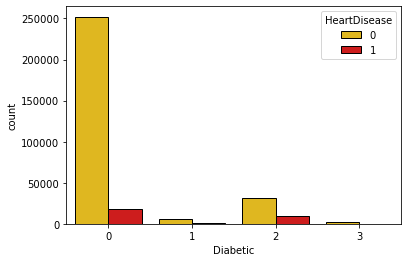

In [16]:
sns.countplot(heart.Diabetic, hue=heart.HeartDisease,palette="hot_r", edgecolor = "black")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

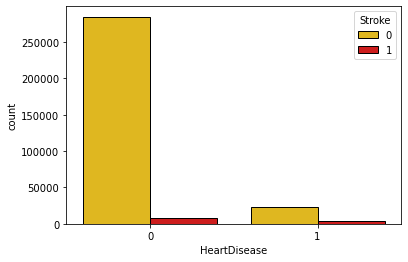

In [17]:
sns.countplot(heart.HeartDisease, hue=heart.Stroke,palette="hot_r", edgecolor = "black")

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

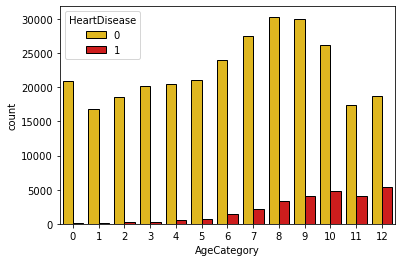

In [18]:
# plt.figure(figsize=(16,9))
sns.countplot(heart.AgeCategory, hue=heart.HeartDisease,palette="hot_r", edgecolor = "black")

# Check model before EDA

### Split Data

In [19]:
X = heart.drop(['HeartDisease'], axis=1)
y = heart['HeartDisease']
X.shape, y.shape

((319795, 17), (319795,))

### Train-Test-Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255836, 17), (63959, 17), (255836,), (63959,))

### 1. Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [22]:
logy_pred = log.predict(X_test)
logy_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
log_accuraccy = log.score(X_test,y_test)*100
log_accuraccy

91.38041557873012

In [24]:
print(confusion_matrix(y_test,logy_pred))

[[57948   438]
 [ 5075   498]]


In [25]:
log_cr = print(classification_report(y_test,logy_pred))
log_cr

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58386
           1       0.53      0.09      0.15      5573

    accuracy                           0.91     63959
   macro avg       0.73      0.54      0.55     63959
weighted avg       0.89      0.91      0.88     63959



In [26]:
log_precision = precision_score(y_test,logy_pred)
log_recall = recall_score(y_test,logy_pred)
log_f1score = f1_score(y_test,logy_pred)

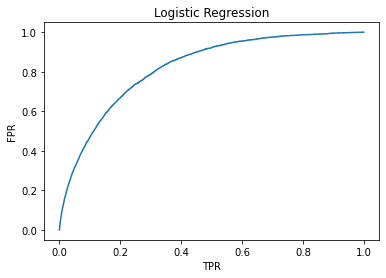

In [27]:
log_prob=log.predict_proba(X_test)
log_df=pd.DataFrame(log_prob)
log_fpr,log_tpr,log_threshold=roc_curve(y_test,log_df.iloc[:,1])
plt.plot(log_fpr,log_tpr)
plt.title('Logistic Regression')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dt_pred = dt.predict(X_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
dt_accuraccy = dt.score(X_test,y_test)*100
dt_accuraccy

86.41317093763192

In [31]:
print(confusion_matrix(y_test,dt_pred))

[[53813  4573]
 [ 4117  1456]]


In [32]:
dt_cr = print(classification_report(y_test,dt_pred))
dt_cr

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58386
           1       0.24      0.26      0.25      5573

    accuracy                           0.86     63959
   macro avg       0.59      0.59      0.59     63959
weighted avg       0.87      0.86      0.87     63959



In [33]:
dt_precision = precision_score(y_test,dt_pred)
dt_recall = recall_score(y_test,dt_pred)
dt_f1score = f1_score(y_test,dt_pred)

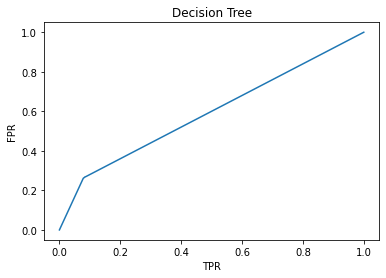

In [34]:
dt_prob=dt.predict_proba(X_test)
dt_df=pd.DataFrame(dt_prob)
dt_fpr,dt_tpr,dt_threshold=roc_curve(y_test,dt_df.iloc[:,1])
plt.plot(dt_fpr,dt_tpr)
plt.title('Decision Tree')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 3. Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
rf_accuraccy = rf.score(X_test, y_test)*100
rf_accuraccy

90.53925170812552

In [38]:
print(confusion_matrix(y_test, rf_pred))

[[57246  1140]
 [ 4911   662]]


In [39]:
rf_cr = print(classification_report(y_test,rf_pred))
rf_cr

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58386
           1       0.37      0.12      0.18      5573

    accuracy                           0.91     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.91      0.88     63959



In [40]:
rf_precision = precision_score(y_test,rf_pred)
rf_recall = recall_score(y_test,rf_pred)
rf_f1score = f1_score(y_test,rf_pred)

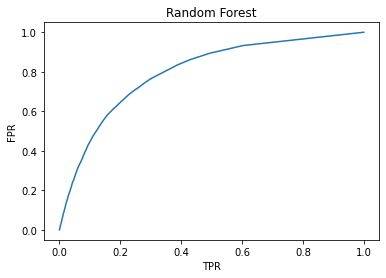

In [41]:
rf_prob=rf.predict_proba(X_test)
rf_df=pd.DataFrame(rf_prob)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,rf_df.iloc[:,1])
plt.plot(rf_fpr,rf_tpr)
plt.title('Random Forest')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 4. Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [43]:
nb_pred = nb.predict(X_test)
nb_pred

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
nb_accuraccy = nb.score(X_test,y_test)*100
nb_accuraccy

83.84902828374427

In [45]:
print(confusion_matrix(y_test, nb_pred))

[[51804  6582]
 [ 3748  1825]]


In [46]:
nb_cr = print(classification_report(y_test, nb_pred))
nb_cr

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     58386
           1       0.22      0.33      0.26      5573

    accuracy                           0.84     63959
   macro avg       0.57      0.61      0.59     63959
weighted avg       0.87      0.84      0.85     63959



In [47]:
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1score = f1_score(y_test, nb_pred)

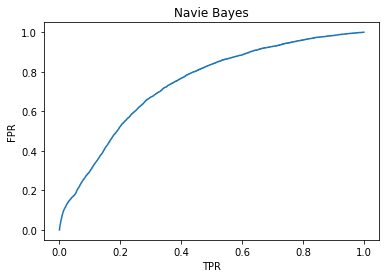

In [48]:
nb_prob=nb.predict_proba(X_test)
nb_df=pd.DataFrame(nb_prob)
nb_fpr,nb_tpr,nb_threshold=roc_curve(y_test,nb_df.iloc[:,1])
plt.plot(nb_fpr,nb_tpr)
plt.title('Navie Bayes')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 5. Ada Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=2)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [50]:
ada_pred = ada.predict(X_test)
ada_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
ada_accuraccy = ada.score(X_test, y_test)*100
ada_accuraccy

89.11802873715973

In [52]:
print(confusion_matrix(y_test, ada_pred))

[[56136  2250]
 [ 4710   863]]


In [53]:
ada_cr = print(classification_report(y_test, ada_pred))
ada_cr

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     58386
           1       0.28      0.15      0.20      5573

    accuracy                           0.89     63959
   macro avg       0.60      0.56      0.57     63959
weighted avg       0.87      0.89      0.88     63959



In [54]:
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1score = f1_score(y_test, ada_pred)

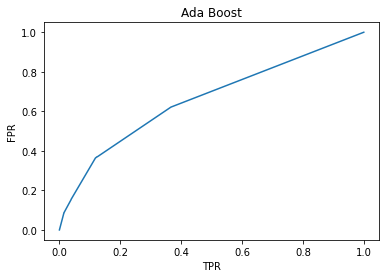

In [55]:
ada_prob=ada.predict_proba(X_test)
ada_df=pd.DataFrame(ada_prob)
ada_fpr,ada_tpr,ada_threshold=roc_curve(y_test,ada_df.iloc[:,1])
plt.plot(ada_fpr,ada_tpr)
plt.title('Ada Boost')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 6. XG Boost

In [56]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
xgb_accuraccy = xgb.score(X_test, y_test)*100
xgb_accuraccy

91.44608264669554

In [59]:
print(confusion_matrix(y_test, xgb_pred))

[[57963   423]
 [ 5048   525]]


In [60]:
xgb_cr = print(classification_report(y_test, xgb_pred))
xgb_cr

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58386
           1       0.55      0.09      0.16      5573

    accuracy                           0.91     63959
   macro avg       0.74      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959



In [61]:
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1score = f1_score(y_test, xgb_pred)

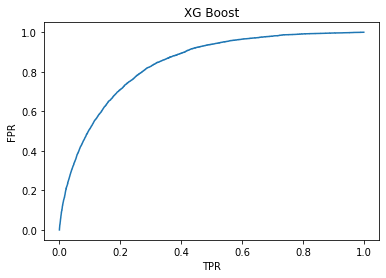

In [62]:
xgb_prob=xgb.predict_proba(X_test)
xgb_df=pd.DataFrame(xgb_prob)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_test,xgb_df.iloc[:,1])
plt.plot(xgb_fpr,xgb_tpr)
plt.title('XG Boost')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 7. SVM

In [63]:
# from sklearn.svm import SVC
# svms = SVC(probability=True)
# svms.fit(X_train, y_train)

In [64]:
# svms_pred = svms.predict(X_test)
# svms_pred

In [65]:
# svms_accuraccy = svms.score(X_test, y_test)
# svms_accuraccy

In [66]:
# svms_accuraccy = svms_accuraccy*100
# svms_accuraccy

In [67]:
# print(confusion_matrix(y_test, svms_pred))

In [68]:
# svms_cr = print(classification_report(y_test, svms_pred))
# svms_cr

In [69]:
# svms_precision = precision_score(y_test, svms_pred)
# svms_recall = recall_score(y_test, svms_pred)
# svms_f1score = f1_score(y_test, svms_pred)

In [70]:
# svms_prob=svms.predict_proba(X_test)
# svms_df=pd.DataFrame(svms_prob)
# svms_fpr,svms_tpr,svms_threshold=roc_curve(y_test,svms_df.iloc[:,1])
# plt.plot(svms_fpr,svms_tpr)
# plt.title('SVM')
# plt.xlabel('TPR')
# plt.ylabel('FPR')
# plt.show()

### 8. KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
knn_accuraccy = knn.score(X_test, y_test)*100
knn_accuraccy

90.60022827123626

In [74]:
print(confusion_matrix(y_test, knn_pred))

[[57454   932]
 [ 5080   493]]


In [75]:
knn_cr = print(classification_report(y_test, knn_pred))
knn_cr

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58386
           1       0.35      0.09      0.14      5573

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.55     63959
weighted avg       0.87      0.91      0.88     63959



In [76]:
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1score = f1_score(y_test, knn_pred)

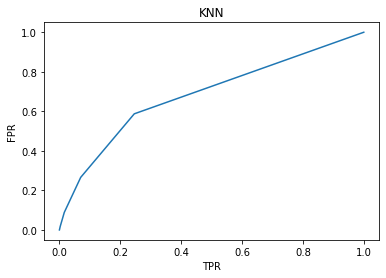

In [77]:
knn_prob=knn.predict_proba(X_test)
knn_df=pd.DataFrame(knn_prob)
knn_fpr,knn_tpr,knn_threshold=roc_curve(y_test,knn_df.iloc[:,1])
plt.plot(knn_fpr,knn_tpr)
plt.title('KNN')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Conclusion

In [78]:
lst_1 = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Ada Boost','XG Boost','KNN'] #'SVM',
lst_2 = [log_accuraccy, dt_accuraccy,rf_accuraccy, nb_accuraccy, ada_accuraccy, xgb_accuraccy, knn_accuraccy] #svms_accuraccy,
lst_precision = [log_precision, dt_precision, rf_precision, nb_precision, ada_precision, xgb_precision, knn_precision] #svms_precision, 
lst_recall = [log_recall, dt_recall, rf_recall, nb_recall, ada_recall, xgb_recall, knn_recall] #svms_recall, 
lst_f1score = [log_f1score, dt_f1score, rf_f1score, nb_f1score, ada_f1score, xgb_f1score, knn_f1score] #svms_f1score, 
df = pd.DataFrame({'Model Name':lst_1, 'Accuraccy':lst_2, 'Precision' : lst_precision, 'Recall'  : lst_recall, 'f1 - Score' : lst_f1score})
df

,Model Name,Accuraccy,Precision,Recall,f1 - Score
0,Logistic Regression,91.380416,0.532051,0.089359,0.153019
1,Decision Tree,86.413171,0.241499,0.261260,0.250991
2,Random Forest,90.539252,0.367370,0.118787,0.179525
3,Naive Bayes,83.849028,0.217081,0.327472,0.261087
4,Ada Boost,89.118029,0.277225,0.154854,0.198711
5,XG Boost,91.446083,0.553797,0.094204,0.161018
6,KNN,90.600228,0.345965,0.088462,0.140897


# Class Imbalance Treatment Using SMOTE

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
s=SMOTE()

In [81]:
x_s,y_s=s.fit_resample(X,y)

In [82]:
x_s.shape,y_s.shape

((584844, 17), (584844,))

In [83]:
x_s.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [84]:
y_s.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int32

In [85]:
x3_tr,x3_te,y3_tr,y3_te=train_test_split(x_s,y_s,test_size=.2,random_state=50)
x3_tr.shape,x3_te.shape,y3_tr.shape,y3_te.shape

((467875, 17), (116969, 17), (467875,), (116969,))

In [86]:
y_s = pd.DataFrame(y_s)

In [87]:
y_s

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
584839,1
584840,1
584841,1
584842,1


In [88]:
heart_class = pd.concat([x_s, y_s], axis=1)
heart_class.shape

(584844, 18)

# EDA

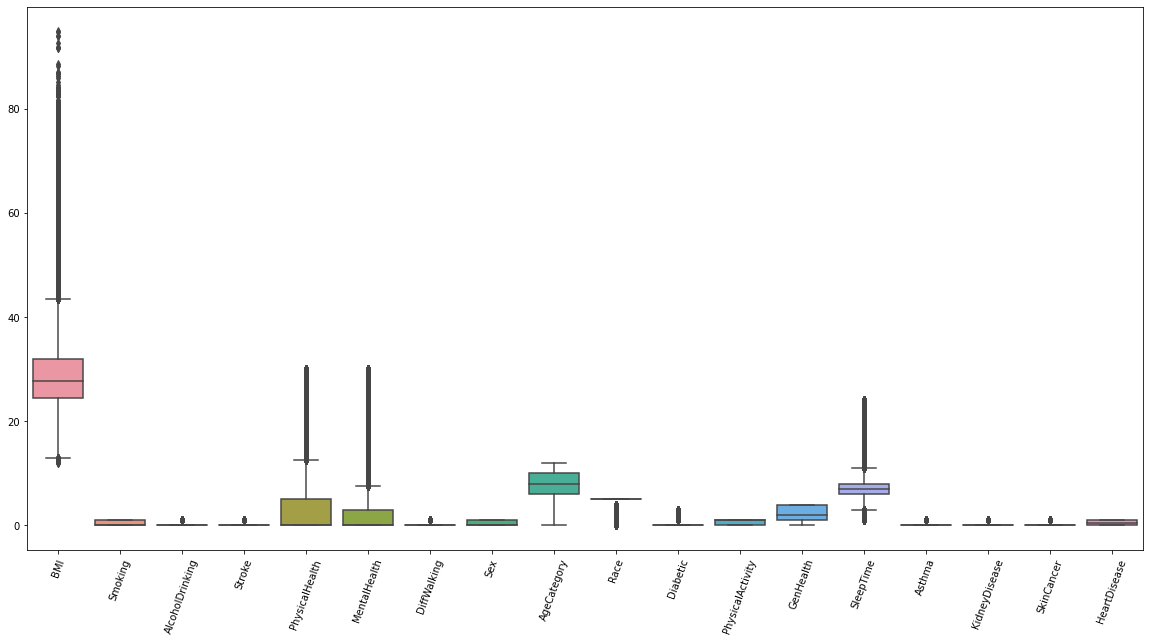

In [89]:
plt.figure(figsize=(20,10))
sns.boxplot(data=heart_class)
plt.xticks(rotation = 70)
plt.show()

### For BMI

In [90]:
heart_class.BMI.describe()

count    584844.000000
mean         28.810632
std           6.440440
min          12.020000
25%          24.406447
50%          27.750000
75%          32.020000
max          94.850000
Name: BMI, dtype: float64

In [91]:
heart_class.BMI.value_counts()

26.630000    4037
27.460000    2923
24.410000    2868
27.440000    2854
27.120000    2736
             ... 
23.912605       1
25.811072       1
37.297752       1
28.666914       1
22.217511       1
Name: BMI, Length: 260139, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

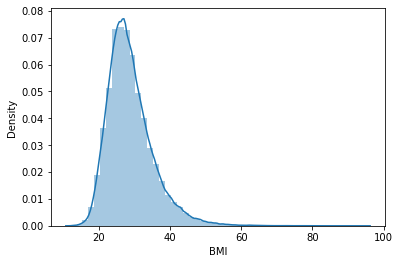

In [92]:
sns.distplot(heart_class.BMI)

<AxesSubplot:ylabel='BMI'>

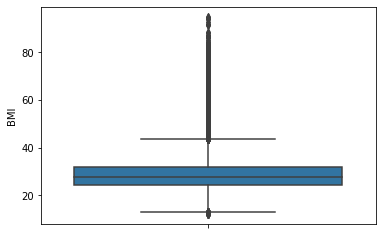

In [93]:
sns.boxplot(y = heart_class.BMI, data = heart_class)

<AxesSubplot:>

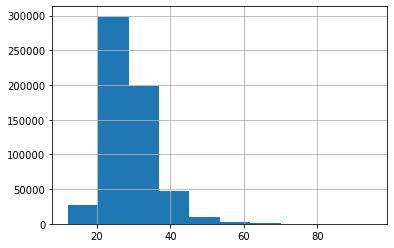

In [94]:
heart_class.BMI.hist()

In [95]:
Q1_BMI = heart_class.BMI.quantile(0.25)
Q3_BMI = heart_class.BMI.quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI
LL_BMI = Q1_BMI - (3*IQR_BMI)
UL_BMI = Q3_BMI + (3*IQR_BMI)

heart_class[(heart_class.BMI < LL_BMI) | (heart_class.BMI > UL_BMI)]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
105,58.540000,0,0,0,30.000000,0.000000,1,1,9,4,1,1,3,3.000000,1,0,0,0
504,54.870000,0,0,0,15.000000,15.000000,1,0,10,5,0,0,3,4.000000,0,0,1,0
551,55.980000,0,0,0,15.000000,0.000000,1,0,12,5,2,0,1,7.000000,1,0,1,0
561,75.820000,0,0,0,0.000000,0.000000,0,0,6,5,0,1,2,8.000000,1,1,0,0
686,55.850000,0,0,0,30.000000,0.000000,0,1,8,5,2,0,1,6.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583519,66.977630,0,0,0,0.803376,2.803376,0,0,6,2,0,0,0,7.401688,0,0,0,1
583994,58.813572,0,0,0,30.000000,30.000000,1,0,7,5,0,0,1,6.508117,1,0,0,1
584473,56.334635,0,0,1,30.000000,14.616724,1,0,7,1,2,0,2,4.383276,0,0,0,1
584641,56.069344,1,0,0,29.094197,0.000000,1,1,8,4,1,0,1,7.905803,0,1,0,1


In [96]:
heart_class.loc[heart_class.BMI>UL_BMI,'BMI']=UL_BMI
heart_class.loc[heart_class.BMI<LL_BMI,'BMI']=LL_BMI

### For Physical health

<AxesSubplot:ylabel='PhysicalHealth'>

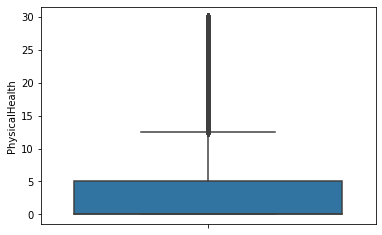

In [97]:
sns.boxplot(y = heart_class.PhysicalHealth,data = heart_class)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

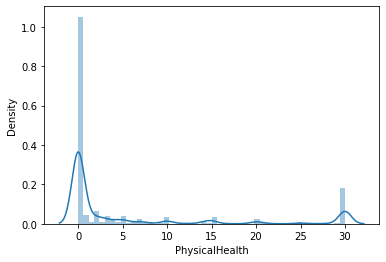

In [98]:
sns.distplot(heart_class.PhysicalHealth)

<AxesSubplot:>

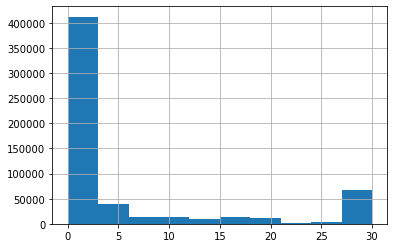

In [99]:
heart_class.PhysicalHealth.hist()

In [100]:
heart_class.PhysicalHealth.describe()

count    584844.000000
mean          5.356332
std           9.955046
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          30.000000
Name: PhysicalHealth, dtype: float64

In [101]:
heart_class.PhysicalHealth.value_counts()

0.000000     363678
30.000000     63358
2.000000      20109
5.000000      12868
10.000000     12377
              ...  
5.260451          1
4.566239          1
8.362721          1
4.719653          1
2.592819          1
Name: PhysicalHealth, Length: 43103, dtype: int64

### For Mental Health

In [102]:
heart_class.MentalHealth.describe()

count    584844.000000
mean          4.208758
std           8.535963
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [103]:
heart_class.MentalHealth.value_counts()

0.000000     379388
30.000000     39041
2.000000      19797
5.000000      19421
15.000000     17244
              ...  
2.515156          1
5.447533          1
0.277125          1
7.959918          1
3.070796          1
Name: MentalHealth, Length: 36090, dtype: int64

<AxesSubplot:ylabel='MentalHealth'>

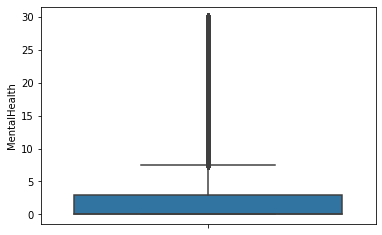

In [104]:
sns.boxplot(y = heart_class.MentalHealth, data = heart_class)

<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

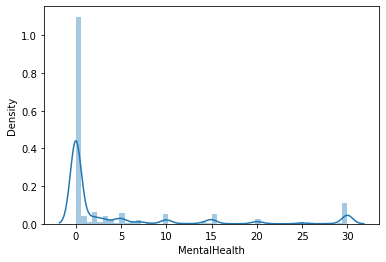

In [105]:
sns.distplot(heart_class.MentalHealth)

<AxesSubplot:>

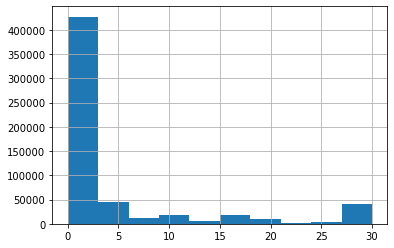

In [106]:
heart_class.MentalHealth.hist()

### SleepTime

In [107]:
heart_class.SleepTime.describe()

count    584844.000000
mean          7.115363
std           1.519389
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

<AxesSubplot:ylabel='SleepTime'>

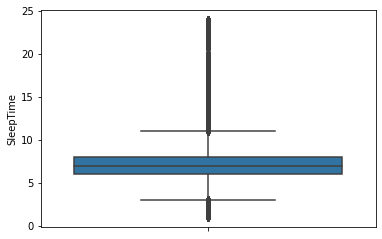

In [108]:
sns.boxplot(y = heart_class.SleepTime, data=heart_class)

<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

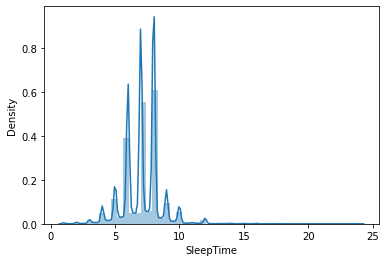

In [109]:
sns.distplot(heart_class.SleepTime)

<AxesSubplot:>

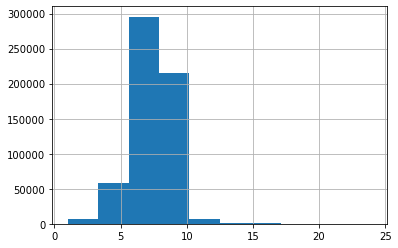

In [110]:
heart_class.SleepTime.hist()

In [111]:
Q1_SleepTime = heart_class.SleepTime.quantile(0.25)
Q3_SleepTime = heart_class.SleepTime.quantile(0.75)
IQR_SleepTime = Q3_SleepTime - Q1_SleepTime
LL_SleepTime = Q1_SleepTime - (3*IQR_SleepTime)
UL_SleepTime = Q3_SleepTime + (3*IQR_SleepTime)

heart_class[(heart_class.SleepTime < LL_SleepTime) | (heart_class.SleepTime > UL_SleepTime)]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
10,34.300000,1,0,0,30.000000,0.000000,1,1,8,5,2,0,3,15.000000,1,0,0,1
262,32.780000,0,0,0,0.000000,0.000000,0,1,10,2,0,0,4,15.000000,0,0,0,0
618,46.680000,0,0,0,30.000000,15.000000,1,0,7,2,0,1,2,16.000000,0,0,0,0
718,19.790000,1,0,1,30.000000,10.000000,1,0,8,2,0,0,3,18.000000,1,0,0,0
733,30.510000,0,0,0,5.000000,0.000000,0,0,8,2,2,1,2,15.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582140,27.189673,0,0,0,30.000000,0.000000,0,0,12,5,0,0,3,14.463419,0,0,0,1
582215,38.261054,0,0,1,30.000000,30.000000,1,0,10,5,1,0,3,19.920114,1,0,0,1
583457,27.600799,0,0,0,0.000000,15.000000,0,0,6,3,0,0,2,17.177439,0,0,0,1
583943,29.023655,0,0,0,17.008006,0.000000,1,0,12,5,0,0,2,19.212810,0,0,0,1


In [112]:
heart_class.loc[heart_class.SleepTime>UL_SleepTime,'SleepTime']=UL_SleepTime
heart_class.loc[heart_class.SleepTime<LL_SleepTime,'SleepTime']=LL_SleepTime

# Data Transformation

### For BMI

In [113]:
# Check zero values present or not
heart_class[heart_class['BMI']==0]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease


<AxesSubplot:xlabel='BMI', ylabel='Density'>

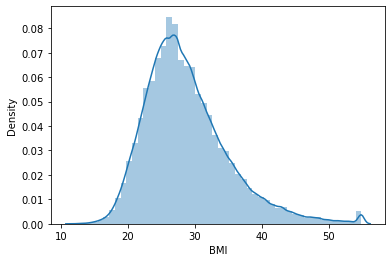

In [114]:
sns.distplot(heart_class.BMI)

In [115]:
heart_class.BMI.skew()

1.0418766512733941

In [116]:
heart_class.BMI = np.sqrt(heart_class.BMI)
heart_class.BMI.skew()

0.6766267658110593

<AxesSubplot:xlabel='BMI', ylabel='Density'>

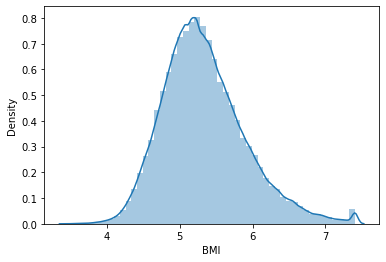

In [117]:
sns.distplot(heart_class.BMI)

### For SleepTime

In [118]:
# Check zero values present or not
heart_class[heart_class['SleepTime']==0]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease


<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

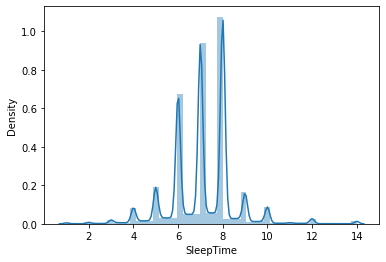

In [119]:
sns.distplot(heart_class.SleepTime)

In [120]:
heart_class.SleepTime.skew()

0.22156956816803575

In [121]:
heart_class.skew()

BMI                 0.676627
Smoking             0.274373
AlcoholDrinking     4.733297
Stroke              4.540734
PhysicalHealth      1.768024
MentalHealth        2.175174
DiffWalking         1.637775
Sex                 0.112316
AgeCategory        -0.687497
Race               -2.118367
Diabetic            1.386230
PhysicalActivity   -0.687935
GenHealth           0.054555
SleepTime           0.221570
Asthma              2.673924
KidneyDisease       5.050600
SkinCancer          2.872155
HeartDisease        0.000000
dtype: float64

# Split Data After Class Imblance

In [122]:
heart_class.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,4.074310,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1,0
1,4.509989,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0,0
2,5.155580,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0,0
3,4.920366,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1,0
4,4.869292,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0,0


In [123]:
X_af_Out = heart_class.drop(['HeartDisease'], axis=1)
y_af_Out = heart_class['HeartDisease']

In [124]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_af_Out, y_af_Out, test_size= 0.2, random_state=101)
X_train_out.shape, X_test_out.shape, y_train_out.shape, y_test_out.shape

((467875, 17), (116969, 17), (467875,), (116969,))

# Feature selection

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply select k_best algorithm

In [126]:
cst=SelectKBest(score_func=chi2,k="all")
cst_fit=cst.fit(X_af_Out, y_af_Out)

In [127]:
cst_score=cst_fit.scores_
cst_score

array([3.24334718e+02, 1.73468247e+03, 1.43854187e+04, 3.59883917e+03,
       6.28875400e+05, 2.00635359e+04, 1.37539625e+04, 6.77362857e+01,
       1.49379087e+05, 5.90472812e+02, 4.29378730e+04, 1.39020891e+04,
       2.36382538e+03, 3.16479080e+01, 5.33052190e+03, 7.37814566e+02,
       1.46398234e+02])

In [128]:
feat=pd.DataFrame({"columns":list(X_af_Out), "Score":list(cst_score)})
feat.nlargest(17, 'Score')

,columns,Score
4,PhysicalHealth,628875.400177
8,AgeCategory,149379.087136
10,Diabetic,42937.872988
5,MentalHealth,20063.535889
2,AlcoholDrinking,14385.418665
11,PhysicalActivity,13902.089096
6,DiffWalking,13753.962521
14,Asthma,5330.521903
3,Stroke,3598.839171
12,GenHealth,2363.825379


In [129]:
# All features are important so we can not drop any of them

# Feature Scalling

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [131]:
scaler.fit(X_train_out)

MinMaxScaler()

In [132]:
X_train_out = scaler.transform(X_train_out)
X_test_out = scaler.transform(X_test_out)

# Implementation OF Machine Learning Algorithm after EDA

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### 1. Logistic Regression

In [134]:
log_out = LogisticRegression()
log_out.fit(X_train_out, y_train_out)

LogisticRegression()

In [135]:
log_out_pred = log_out.predict(X_test_out)
log_out_pred

array([1, 0, 0, ..., 0, 0, 1])

In [136]:
log_out_accuraccy = log_out.score(X_test_out, y_test_out)*100
log_out_accuraccy

73.57333994477169

In [137]:
print(confusion_matrix(y_test_out,log_out_pred))

[[41128 17458]
 [13453 44930]]


In [138]:
log_out_cr = print(classification_report(y_test_out,log_out_pred))
log_out_cr

              precision    recall  f1-score   support

           0       0.75      0.70      0.73     58586
           1       0.72      0.77      0.74     58383

    accuracy                           0.74    116969
   macro avg       0.74      0.74      0.74    116969
weighted avg       0.74      0.74      0.74    116969



In [139]:
log_out_precision = precision_score(y_test_out,log_out_pred)
log_out_recall = recall_score(y_test_out,log_out_pred)
log_out_f1score = f1_score(y_test_out,log_out_pred)

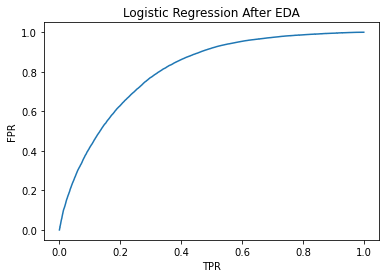

In [140]:
log_out_prob=log_out.predict_proba(X_test_out)
log_out_df=pd.DataFrame(log_out_prob)
log_out_fpr,log_out_tpr,log_out_threshold=roc_curve(y_test_out,log_out_df.iloc[:,1])
plt.plot(log_out_fpr,log_out_tpr)
plt.title('Logistic Regression After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 2. Decision Tree

In [141]:
dt_out = DecisionTreeClassifier()
dt_out.fit(X_train_out,y_train_out)

DecisionTreeClassifier()

In [142]:
dt_pred_out = dt_out.predict(X_test_out)
dt_pred_out

array([1, 0, 0, ..., 1, 0, 1])

In [143]:
dt_out_accuraccy = dt_out.score(X_test_out, y_test_out)*100
dt_out_accuraccy

87.45736049722575

In [144]:
print(confusion_matrix(y_test_out,dt_pred_out))

[[50411  8175]
 [ 6496 51887]]


In [145]:
dt_out_cr = print(classification_report(y_test_out, dt_pred_out))
dt_out_cr

              precision    recall  f1-score   support

           0       0.89      0.86      0.87     58586
           1       0.86      0.89      0.88     58383

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



In [146]:
dt_out_precision = precision_score(y_test_out,dt_pred_out)
dt_out_recall = recall_score(y_test_out,dt_pred_out)
dt_out_f1score = f1_score(y_test_out,dt_pred_out)

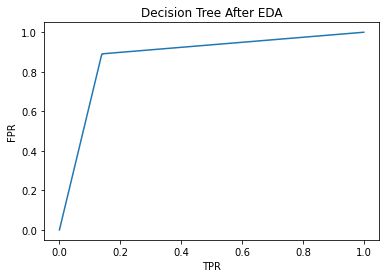

In [147]:
dt_out_prob=dt_out.predict_proba(X_test_out)
dt_out_df=pd.DataFrame(dt_out_prob)
dt_out_fpr,dt_out_tpr,dt_out_threshold=roc_curve(y_test_out,dt_out_df.iloc[:,1])
plt.plot(dt_out_fpr,dt_out_tpr)
plt.title('Decision Tree After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 3. Random Forest

In [148]:
rf_out = RandomForestClassifier()
rf_out.fit(X_train_out,y_train_out)

RandomForestClassifier()

In [149]:
rf_pred_out = rf_out.predict(X_test_out)
rf_pred_out

array([1, 0, 0, ..., 1, 0, 0])

In [150]:
rf_out_accuraccy = rf_out.score(X_test_out, y_test_out)*100
rf_out_accuraccy

90.86681086441708

In [151]:
print(confusion_matrix(y_test_out, rf_pred_out))

[[52331  6255]
 [ 4428 53955]]


In [152]:
rf_out_cr = print(classification_report(y_test_out, rf_pred_out))
rf_out_cr

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     58586
           1       0.90      0.92      0.91     58383

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969



In [153]:
rf_out_precision = precision_score(y_test_out,rf_pred_out)
rf_out_recall = recall_score(y_test_out,rf_pred_out)
rf_out_f1score = f1_score(y_test_out,rf_pred_out)

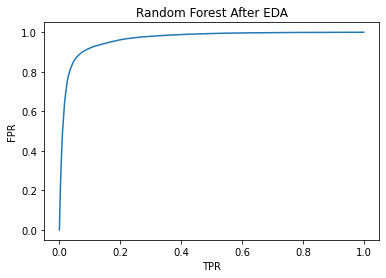

In [154]:
rf_out_prob=rf_out.predict_proba(X_test_out)
rf_out_df=pd.DataFrame(rf_out_prob)
rf_out_fpr,rf_out_tpr,rf_out_threshold=roc_curve(y_test_out,rf_out_df.iloc[:,1])
plt.plot(rf_out_fpr,rf_out_tpr)
plt.title('Random Forest After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 4. Naive Bayes

In [155]:
nb_out = MultinomialNB()
nb_out.fit(X_train_out,y_train_out)

MultinomialNB()

In [156]:
nb_pred_out = nb_out.predict(X_test_out)
nb_pred_out

array([1, 0, 0, ..., 0, 0, 1])

In [157]:
nb_out_accuraccy = nb_out.score(X_test_out,y_test_out)*100
nb_out_accuraccy

68.15993981311289

In [158]:
print(confusion_matrix(y_test_out, nb_pred_out))

[[43316 15270]
 [21973 36410]]


In [159]:
nb_out_cr = print(classification_report(y_test_out, nb_pred_out))
nb_out_cr

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     58586
           1       0.70      0.62      0.66     58383

    accuracy                           0.68    116969
   macro avg       0.68      0.68      0.68    116969
weighted avg       0.68      0.68      0.68    116969



In [160]:
nb_out_precision = precision_score(y_test_out,nb_pred_out)
nb_out_recall = recall_score(y_test_out,nb_pred_out)
nb_out_f1score = f1_score(y_test_out,nb_pred_out)

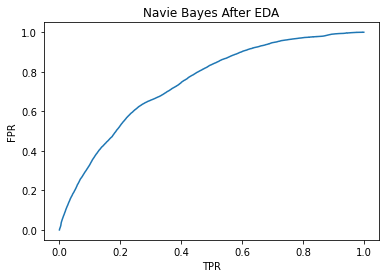

In [161]:
nb_out_prob=nb_out.predict_proba(X_test_out)
nb_out_df=pd.DataFrame(nb_out_prob)
nb_out_fpr,nb_out_tpr,nb_out_threshold=roc_curve(y_test_out,nb_out_df.iloc[:,1])
plt.plot(nb_out_fpr,nb_out_tpr)
plt.title('Navie Bayes After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 5. Ada Boost

In [162]:
ada_out = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=2)
ada_out.fit(X_train_out, y_train_out)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [163]:
ada_pred_out = ada_out.predict(X_test_out)
ada_pred_out

array([1, 0, 0, ..., 1, 0, 1])

In [164]:
ada_out_accuraccy = ada_out.score(X_test_out, y_test_out)*100
ada_out_accuraccy

88.52516478725133

In [165]:
print(confusion_matrix(y_test_out, ada_pred_out))

[[53293  5293]
 [ 8129 50254]]


In [166]:
ada_out_cr = print(classification_report(y_test_out, ada_pred_out))
ada_out_cr

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     58586
           1       0.90      0.86      0.88     58383

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969



In [167]:
ada_out_precision = precision_score(y_test_out,ada_pred_out)
ada_out_recall = recall_score(y_test_out,ada_pred_out)
ada_out_f1score = f1_score(y_test_out,ada_pred_out)

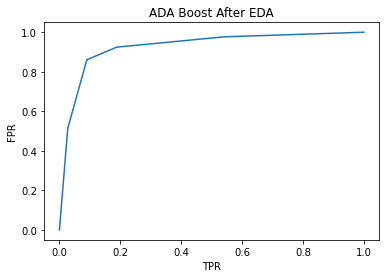

In [168]:
ada_out_prob=ada_out.predict_proba(X_test_out)
ada_out_df=pd.DataFrame(ada_out_prob)
ada_out_fpr,ada_out_tpr,ada_out_threshold=roc_curve(y_test_out,ada_out_df.iloc[:,1])
plt.plot(ada_out_fpr,ada_out_tpr)
plt.title('ADA Boost After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 6. XG Boost

In [169]:
xgb_out=XGBClassifier()
xgb_out.fit(X_train_out, y_train_out)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [170]:
xgb_pred_out = xgb_out.predict(X_test_out)
xgb_pred_out

array([1, 0, 0, ..., 1, 0, 0])

In [171]:
xgb_out_accuraccy = xgb_out.score(X_test_out, y_test_out)*100
xgb_out_accuraccy

86.91106190529115

In [172]:
print(confusion_matrix(y_test_out, xgb_pred_out))

[[51270  7316]
 [ 7994 50389]]


In [173]:
xgb_out_cr = print(classification_report(y_test_out, xgb_pred_out))
xgb_out_cr

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     58586
           1       0.87      0.86      0.87     58383

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



In [174]:
xgb_out_precision = precision_score(y_test_out,xgb_pred_out)
xgb_out_recall = recall_score(y_test_out,xgb_pred_out)
xgb_out_f1score = f1_score(y_test_out,xgb_pred_out)

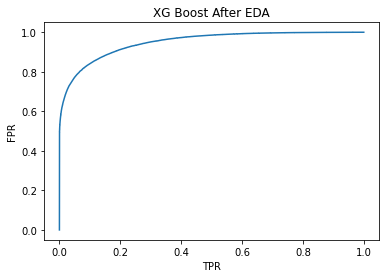

In [175]:
xgb_out_prob=xgb_out.predict_proba(X_test_out)
xgb_out_df=pd.DataFrame(xgb_out_prob)
xgb_out_fpr,xgb_out_tpr,xgb_out_threshold=roc_curve(y_test_out,xgb_out_df.iloc[:,1])
plt.plot(xgb_out_fpr,xgb_out_tpr)
plt.title('XG Boost After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### 7. SVM

In [176]:
# svms_out = SVC()
# svms_out.fit(X_train_out, y_train_out)

In [177]:
# svms_pred_out = svms_out.predict(X_test_out)
# svms_pred_out

In [178]:
# svms_out_accuraccy = svms_out.score(X_test_out, y_test_out)*100
# svms_out_accuraccy

In [179]:
# print(confusion_matrix(y_test_out, svms_pred_out))

In [180]:
# svms_out_cr = print(classification_report(y_test_out, svms_pred_out))
# svms_out_cr

In [181]:
# svms_out_precision = precision_score(y_test_out,svms_pred_out)
# svms_out_recall = recall_score(y_test_out,svms_pred_out)
# svms_out_f1score = f1_score(y_test_out,svms_pred_out)

In [182]:
# svms_out_prob=svms_out.predict_proba(X_test_out)
# svms_out_df=pd.DataFrame(svms_out_prob)
# svms_out_fpr,svms_out_tpr,svms_out_threshold=roc_curve(y_test_out,svms_out_df.iloc[:,1])
# plt.plot(svms_out_fpr,svms_out_tpr)
# plt.title('SVM After EDA')
# plt.xlabel('TPR')
# plt.ylabel('FPR')
# plt.show()

### 8. KNN

In [183]:
knn_out = KNeighborsClassifier()
knn_out.fit(X_train_out, y_train_out)

KNeighborsClassifier()

In [184]:
knn_pred_out = knn_out.predict(X_test_out)
knn_pred_out

array([1, 0, 0, ..., 1, 0, 1])

In [185]:
knn_out_accuraccy = knn_out.score(X_test_out, y_test_out)*100
knn_out_accuraccy

83.28275013037643

In [186]:
print(confusion_matrix(y_test_out, knn_pred_out))

[[44793 13793]
 [ 5761 52622]]


In [187]:
knn_out_cr = print(classification_report(y_test_out, knn_pred_out))
knn_out_cr

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     58586
           1       0.79      0.90      0.84     58383

    accuracy                           0.83    116969
   macro avg       0.84      0.83      0.83    116969
weighted avg       0.84      0.83      0.83    116969



In [188]:
knn_out_precision = precision_score(y_test_out,knn_pred_out)
knn_out_recall = recall_score(y_test_out,knn_pred_out)
knn_out_f1score = f1_score(y_test_out,knn_pred_out)

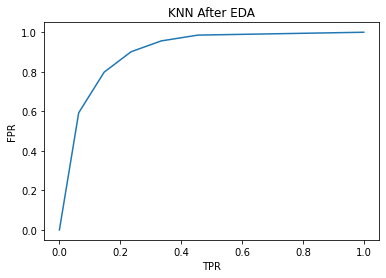

In [189]:
knn_out_prob=knn_out.predict_proba(X_test_out)
knn_out_df=pd.DataFrame(knn_out_prob)
knn_out_fpr,knn_out_tpr,knn_out_threshold=roc_curve(y_test_out,knn_out_df.iloc[:,1])
plt.plot(knn_out_fpr,knn_out_tpr)
plt.title('KNN After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Conclusion

In [190]:
list_out_1 = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Ada Boost','XG Boost','KNN'] #'SVM',
list_out_2 = [log_out_accuraccy, dt_out_accuraccy,rf_out_accuraccy, nb_out_accuraccy, ada_out_accuraccy, xgb_out_accuraccy, knn_out_accuraccy] #svms_out_accuraccy, 
list_out_precision = [log_out_precision, dt_out_precision, rf_out_precision, nb_out_precision, ada_out_precision, xgb_out_precision, knn_out_precision] #svms_out_precision, 
list_out_recall = [log_out_recall, dt_out_recall, rf_out_recall, nb_out_recall, ada_out_recall, xgb_out_recall, knn_out_recall] #svms_out_recall, 
list_out_f1score = [log_out_f1score, dt_out_f1score, rf_out_f1score, nb_out_f1score, ada_out_f1score, xgb_out_f1score, knn_out_f1score] #svms_out_f1score, 
df1 = pd.DataFrame({ 'Model Name':list_out_1, 'Accuraccy':list_out_2, 'Precision' : list_out_precision, 'Recall'  : list_out_recall, 'f1 - Score' : list_out_f1score})
df1

,Model Name,Accuraccy,Precision,Recall,f1 - Score
0,Logistic Regression,73.573340,0.720171,0.769573,0.744053
1,Decision Tree,87.457360,0.863891,0.888735,0.876137
2,Random Forest,90.866811,0.896114,0.924156,0.909919
3,Naive Bayes,68.159940,0.704528,0.623640,0.661621
4,Ada Boost,88.525165,0.904711,0.860764,0.882191
5,XG Boost,86.911062,0.873217,0.863077,0.868117
6,KNN,83.282750,0.792321,0.901324,0.843315


In [191]:
df # this is before eda

,Model Name,Accuraccy,Precision,Recall,f1 - Score
0,Logistic Regression,91.380416,0.532051,0.089359,0.153019
1,Decision Tree,86.413171,0.241499,0.261260,0.250991
2,Random Forest,90.539252,0.367370,0.118787,0.179525
3,Naive Bayes,83.849028,0.217081,0.327472,0.261087
4,Ada Boost,89.118029,0.277225,0.154854,0.198711
5,XG Boost,91.446083,0.553797,0.094204,0.161018
6,KNN,90.600228,0.345965,0.088462,0.140897


# Graphical Representation Of Output

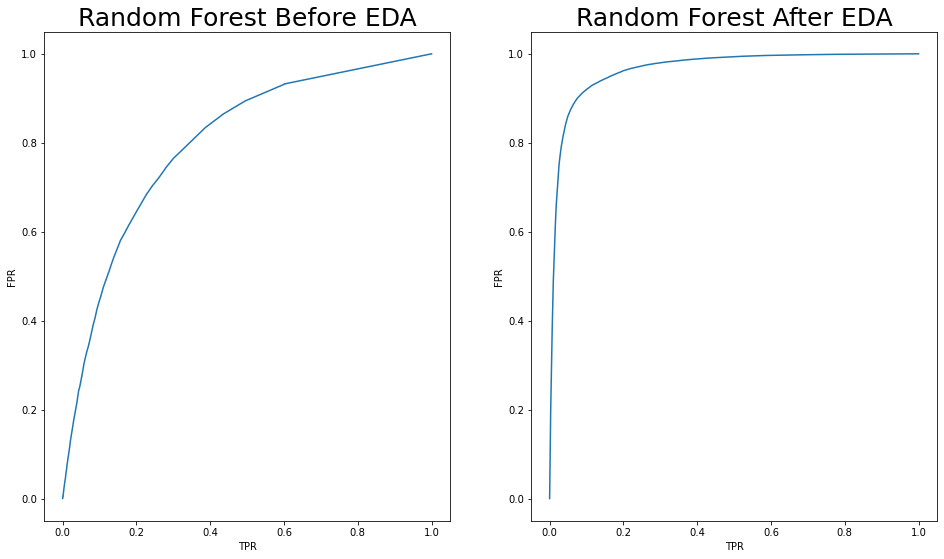

In [192]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.plot(rf_fpr,rf_tpr)
plt.title('Random Forest Before EDA', fontsize=25)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.subplot(122)
plt.plot(rf_out_fpr,rf_out_tpr)
plt.title('Random Forest After EDA', fontsize=25)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.show()

# Cross Validation

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
score = cross_val_score(rf_out, X_af_Out, y_af_Out, cv = kf)

In [200]:
print("Cross validation scores are: {}".format(score))
print("Average cross validation score of RF: {}".format(score.mean()))

Cross validation scores are: [0.84558302 0.85178979 0.88856877 0.92261197 0.92299603]
Average cross validation score of RF: 0.8863099162958272
